## Building Neural Network

In [1]:
import torch
import torchvision
from torchvision import transforms, datasets

In [2]:
train = datasets.MNIST("", 
                       train=True, 
                       download=True,
                      transform = transforms.Compose([transforms.ToTensor()]))

test = datasets.MNIST("", 
                       train=False, 
                       download=True,
                      transform = transforms.Compose([transforms.ToTensor()]))

In [3]:
trainset = torch.utils.data.DataLoader(train, batch_size=10, shuffle=True)

testset = torch.utils.data.DataLoader(test, batch_size=10, shuffle=True)

In [4]:
import torch.nn as nn #object oriented programming
import torch.nn.functional as F


In [5]:
class Net(nn.Module):
    def __init__(self):
        super().__init__() ## super().__init__() initializes nn.Module 
        self.fc1 = nn.Linear(28*28, 64) #input, output can be anything we want
        self.fc2 = nn.Linear(64, 64)
        self.fc3 = nn.Linear(64, 64)
        self.fc4 = nn.Linear(64, 10) #output should be 10classes
    
    def forward(self, x):
        x = F.relu(self.fc1(x)) #activation function
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = self.fc4(x)
        
        return F.log_softmax(x,dim=1)
    
    
net = Net()
print(net)
      

Net(
  (fc1): Linear(in_features=784, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=64, bias=True)
  (fc4): Linear(in_features=64, out_features=10, bias=True)
)


In [6]:
X = torch.rand((28, 28))
X = X.view(-1,28*28) #-1 means size doesn't matter

In [7]:
output = net(X)

In [8]:
output

tensor([[-2.2146, -2.2486, -2.3695, -2.3661, -2.1890, -2.3544, -2.2972, -2.2776,
         -2.3546, -2.3762]], grad_fn=<LogSoftmaxBackward>)

In [12]:
import torch.optim as optim

optimizer = optim.Adam(net.parameters(), lr=0.001)

EPOCHS = 3

for epoch in range(EPOCHS):
    for data in trainset:
        #data is a batch of featuresets and labels
        X, y = data
        net.zero_grad()
        output = net(X.view(-1, 28*28))
        loss = F.nll_loss(output, y)
        loss.backward()
        optimizer.step()
    print(loss)
        

tensor(0.0345, grad_fn=<NllLossBackward>)
tensor(0.1461, grad_fn=<NllLossBackward>)
tensor(0.1945, grad_fn=<NllLossBackward>)


In [15]:
correct = 0
total = 0

with torch.no_grad():
   for data in trainset:
        X, y = data
        output = net(X.view(-1, 784))
        for idx, i in enumerate(output):
            if torch.argmax(i) == y[idx]:
                correct += 1
            total +=1
print("accuracy: ", round(correct/total, 3))

accuracy:  0.978


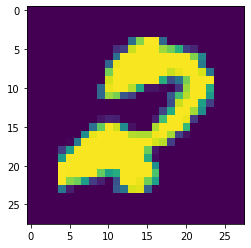

In [24]:
import matplotlib.pyplot as plt

plt.imshow(X[3].view(28, 28))
plt.show()

In [25]:
print(torch.argmax(net(X[3].view(-1, 784))[0]))

tensor(2)
